In [1]:
import numpy as np
import pandas as pd

# Matplotlib and Seaborn
import matplotlib.pyplot as plt
import seaborn as sns
from string import ascii_letters
%matplotlib inline
sns.set()

# Statistical Libraries
from scipy.stats import norm
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from scipy import stats

# Regression Modeling
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

# Other Libraries
import warnings
warnings.filterwarnings("ignore")

In [2]:
insurance = pd.read_csv('insurance.csv')

In [3]:
insurance.head()

,age,sex,bmi,numChild,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.71,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86


In [4]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   numChild  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
insurance.describe()

,age,bmi,numChild,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.664581,1.094918,13270.422414
std,14.049960,6.097922,1.205493,12110.011240
min,18.000000,15.960000,0.000000,1121.870000
25%,27.000000,26.297500,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.695000,2.000000,16639.915000
max,64.000000,53.130000,5.000000,63770.430000


In [6]:
#checking missing values
insurance.isnull().sum()

age         0
sex         0
bmi         0
numChild    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
insurance.nunique()

age           47
sex            2
bmi          536
numChild       6
smoker         2
region         4
charges     1337
dtype: int64

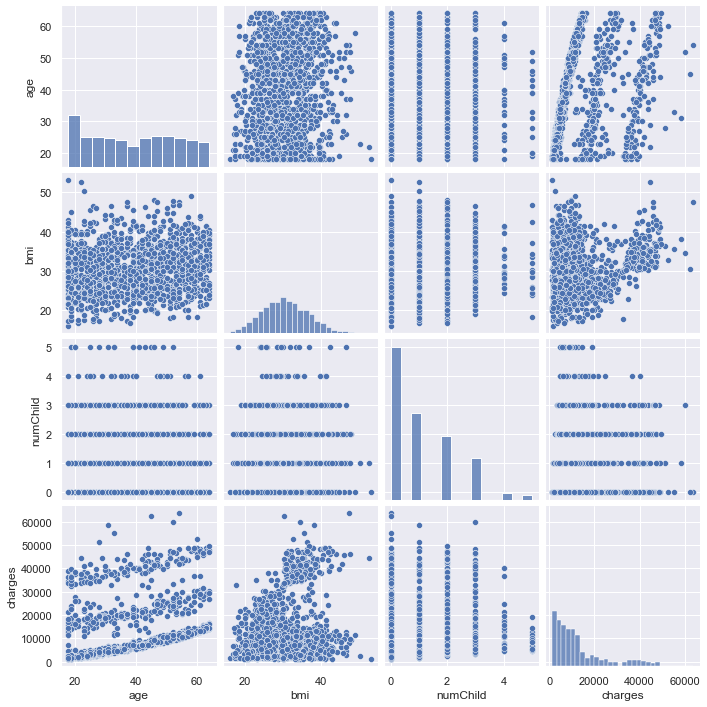

In [8]:
sns.pairplot(insurance)

<Figure size 864x720 with 0 Axes>

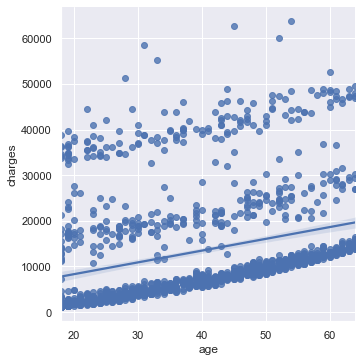

In [9]:
plt.figure(figsize=(12,10))
sns.lmplot(x='age',y='charges',data=insurance)

In [10]:
# comparing values per region
insurance['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<Figure size 864x576 with 0 Axes>

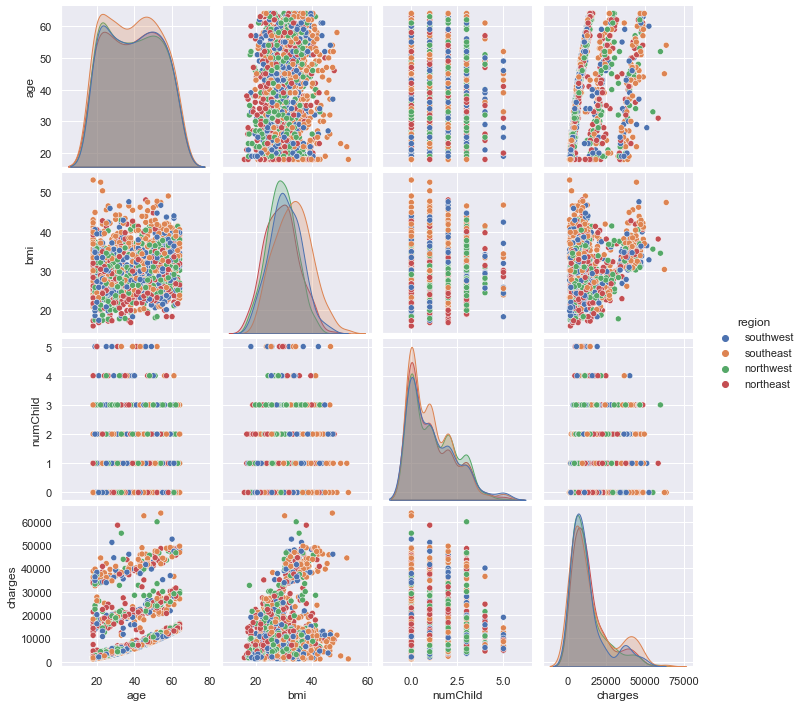

In [11]:
plt.figure(figsize=(12,8))
sns.pairplot(insurance, hue='region')

<Figure size 864x576 with 0 Axes>

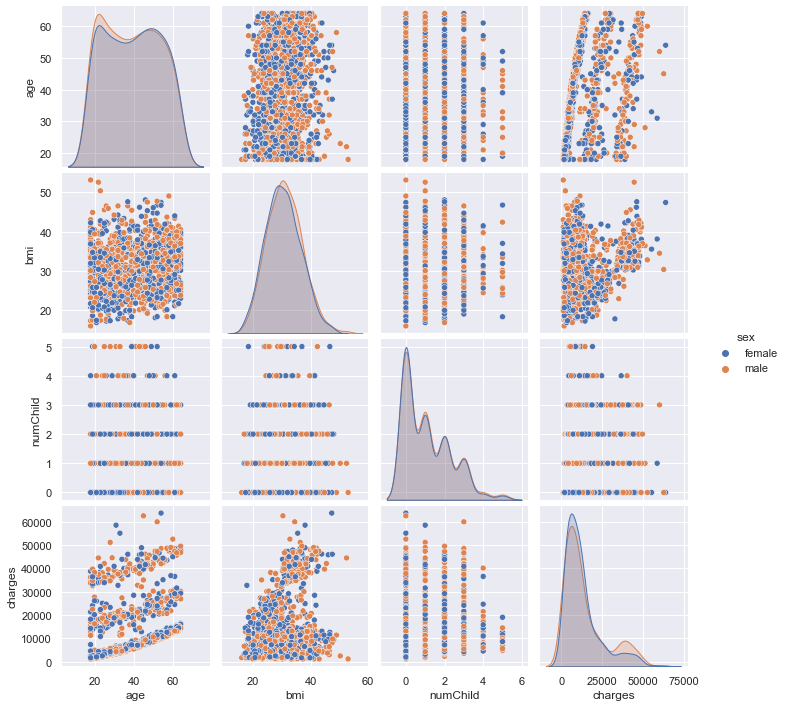

In [12]:
plt.figure(figsize=(12,8))
sns.pairplot(insurance, hue='sex')

<Figure size 864x576 with 0 Axes>

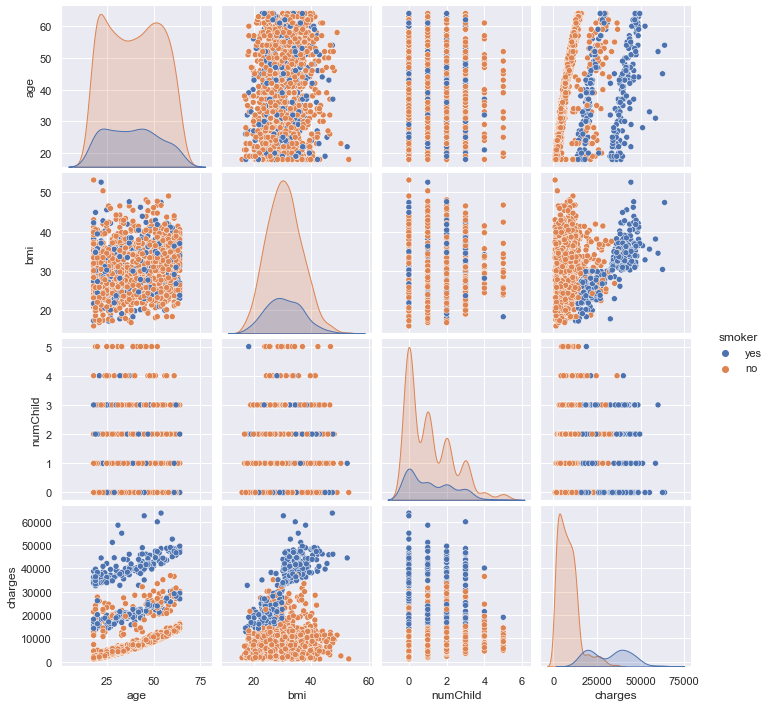

In [13]:
plt.figure(figsize=(12,8))
sns.pairplot(insurance, hue='smoker')

Text(0.5, 1.0, 'Distribution of insurance charges')

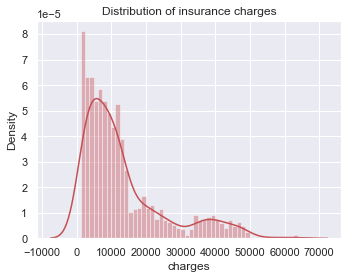

In [14]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(insurance['charges'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance charges')

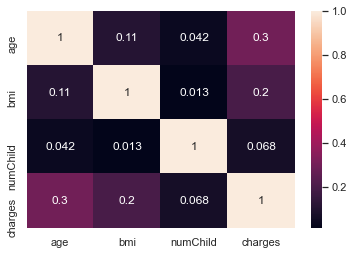

In [15]:
corr = insurance.corr()
sns.heatmap(corr, annot= True);

In [16]:
sex_dummy = pd.get_dummies(insurance['sex'])
smoker_dummy = pd.get_dummies(insurance['smoker'])
region_dummy = pd.get_dummies(insurance['region'])


df = pd.concat([insurance,sex_dummy,smoker_dummy,
                    region_dummy], axis=1)

df.rename(columns={'no': 'non-smoker',
              'yes': 'nicotian'}, inplace=True)

df = df.drop(['sex','smoker','region'], axis = 1)

In [17]:
df.head()

,age,bmi,numChild,charges,female,male,non-smoker,nicotian,northeast,northwest,southeast,southwest
0,19,27.90,0,16884.92,1,0,0,1,0,0,0,1
1,18,33.77,1,1725.55,0,1,1,0,0,0,1,0
2,28,33.00,3,4449.46,0,1,1,0,0,0,1,0
3,33,22.71,0,21984.47,0,1,1,0,0,1,0,0
4,32,28.88,0,3866.86,0,1,1,0,0,1,0,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1338 non-null   int64  
 1   bmi         1338 non-null   float64
 2   numChild    1338 non-null   int64  
 3   charges     1338 non-null   float64
 4   female      1338 non-null   uint8  
 5   male        1338 non-null   uint8  
 6   non-smoker  1338 non-null   uint8  
 7   nicotian    1338 non-null   uint8  
 8   northeast   1338 non-null   uint8  
 9   northwest   1338 non-null   uint8  
 10  southeast   1338 non-null   uint8  
 11  southwest   1338 non-null   uint8  
dtypes: float64(2), int64(2), uint8(8)
memory usage: 52.4 KB


In [31]:
#train test split
X = df[['age', 'bmi', 'numChild',
    'female','male','non-smoker',
    'nicotian','northeast','northwest',
    'southeast','southwest',]]  
y = insurance['charges']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [32]:
#train model 
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)


LinearRegression()

In [33]:
print(lm.intercept_) 

-1006.5708329582994


In [30]:
coeff_insurance = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_insurance

,Coefficient
age,244.507004
bmi,364.945133
numChild,412.986434
female,-54.354987
male,54.354987
non-smoker,-11827.949437
nicotian,11827.949437
northeast,423.928053
northwest,524.813531
southeast,-489.059952


In [34]:
#fit linear regression model
model = sm.OLS(y_train, X_train).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     392.7
Date:                Mon, 16 May 2022   Prob (F-statistic):          7.36e-311
Time:                        02:22:58   Log-Likelihood:                -10846.
No. Observations:                1070   AIC:                         2.171e+04
Df Residuals:                    1061   BIC:                         2.175e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          244.5070     13.556     18.037      0.0

In [36]:
predictions = lm.predict(X_test)
print("Predicted medical costs values:", predictions)

Predicted medical costs values: [10869.23256848  2931.96327822 10551.63054316 27006.93011892
  6217.38521797   434.97746879 15347.1473205   3968.92927222
 11161.89365725  6826.26206393  8229.39256378 10752.09550751
  6493.13536567 12751.61385514 30972.89816484 36900.79776344
 10489.55616139  2871.24426768 15159.83421346 13820.49180861
 30078.99439532  7351.43647149 12740.6948772   5914.03251769
   471.47198214 25134.94429351 12192.70350286 27390.28027849
 37879.68663708  4478.67563868  6058.7987007   7238.32218498
  3553.95296524  2545.00043836  5715.88194485  5964.42608933
   335.79840633 12338.96825697 13784.36937444 11014.48748977
 10292.84436758  9627.90806793 14866.02395458 10324.87637688
  6313.63068629  6168.39520549  8245.83184732  2131.34716781
 12718.91021743  2212.99019054 -1450.87803884  2464.22080572
  7271.00250697  8672.26730131  4310.76139103 14274.19615822
 31619.01297891 11104.23189992 10565.87806952  3799.43918253
   331.48743678 33559.38591051 36506.6445494  13274.2

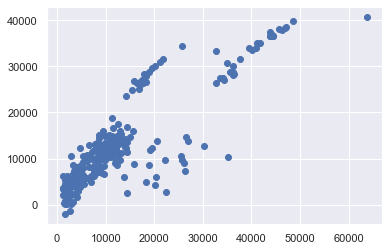

In [37]:
plt.scatter(y_test, predictions)

<AxesSubplot:xlabel='charges', ylabel='Density'>

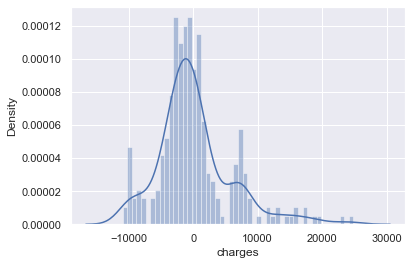

In [38]:
sns.distplot((y_test-predictions), bins=50)

In [40]:
from sklearn import metrics
print('MAE = ',metrics.mean_absolute_error(y_test, predictions))
print('MSE = ',metrics.mean_squared_error(y_test, predictions))

MAE =  4036.865772278072
MSE =  33748606.755860314
